# Import settings

In [1]:
import kagglehub
import pandas as pd

C:\Users\leeun\PycharmProjects\WeatherProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


download datas from kagglehub.

In [2]:
path = kagglehub.dataset_download("muthuj7/weather-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\leeun\.cache\kagglehub\datasets\muthuj7\weather-dataset\versions\1


Put your printed file result to see if the file loaded.

In [3]:
file_path = r"C:/Users/leeun/.cache/kagglehub/datasets/muthuj7/weather-dataset/versions/1/weatherHistory.csv"

df = pd.read_csv(file_path)
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

# Train the Datas
We'll predict **Summary** based on other given datas.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Humidity', 'Formatted Date', 'Precip Type', 'Daily Summary', 'Summary'])
y = df['Summary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=70)
tree_clf.fit(X_train, y_train) # Fit the model to training data

# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

Evaluate the Decision Tree

In [5]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.4849

Classification Report:
                          precision    recall  f1-score   support

                  Breezy       1.00      0.36      0.53        14
        Breezy and Foggy       1.00      0.88      0.93         8
Breezy and Mostly Cloudy       0.42      0.50      0.46       105
     Breezy and Overcast       0.52      0.56      0.54        95
Breezy and Partly Cloudy       0.51      0.39      0.44        83
                   Clear       0.33      0.34      0.33      2129
                 Drizzle       0.25      0.25      0.25         8
                     Dry       0.00      0.00      0.00         4
   Dry and Mostly Cloudy       0.00      0.00      0.00         3
   Dry and Partly Cloudy       0.04      0.11      0.06         9
                   Foggy       0.99      1.00      0.99      1440
 Humid and Mostly Cloudy       0.00      0.00      0.00         5
      Humid and Overcast       0.00      0.00      0.00         2
 Humid and Partly Cloudy       0.

Visualize the result.

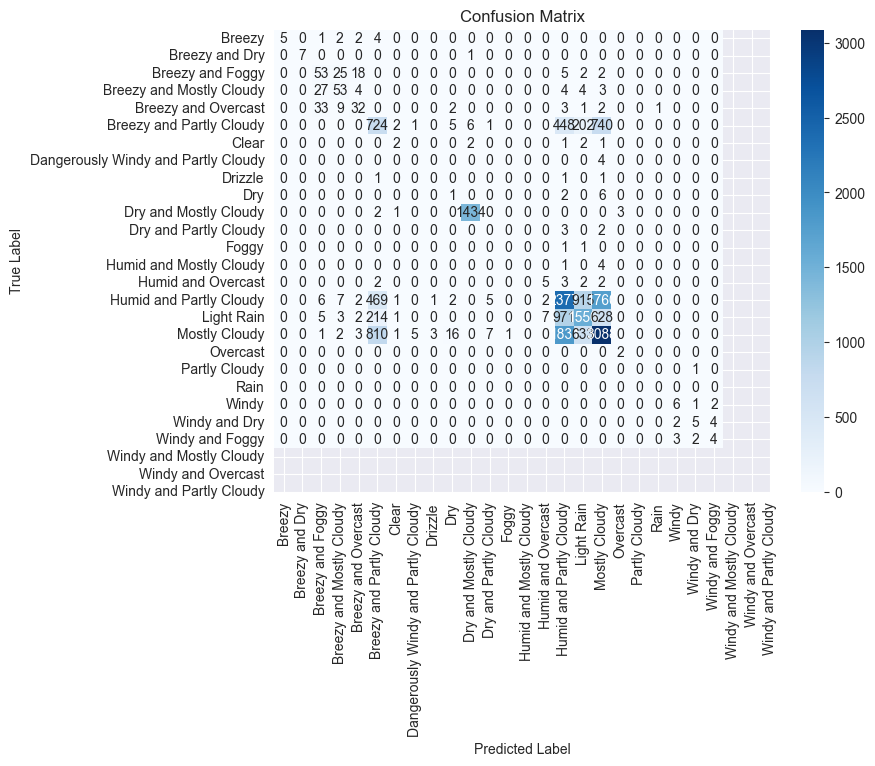


Predicted vs Actual Values (First 10):
Predicted: Foggy, Actual: Foggy
Predicted: Mostly Cloudy, Actual: Clear
Predicted: Clear, Actual: Clear
Predicted: Mostly Cloudy, Actual: Mostly Cloudy
Predicted: Mostly Cloudy, Actual: Mostly Cloudy
Predicted: Partly Cloudy, Actual: Partly Cloudy
Predicted: Overcast, Actual: Overcast
Predicted: Overcast, Actual: Mostly Cloudy
Predicted: Partly Cloudy, Actual: Partly Cloudy
Predicted: Partly Cloudy, Actual: Partly Cloudy


In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_) # Corrected class label
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 4. Predicted vs. Actual values
print("\nPredicted vs Actual Values (First 10):")
for i in range(min(10, len(y_test))):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

## **Understanding the Components of Your Results**

1.  **Accuracy:**
    *   This is a single number representing the percentage of correctly classified instances.
    *   **Interpretation:** A higher accuracy suggests that the model is generally making correct predictions. However, accuracy alone is not sufficient, especially if you have imbalanced classes (some classes have much more data than others).
    *   Accuracy: 0.8972 means that 89.72% of your data is classified correctly.

2.  **Classification Report:**
    *   This provides a detailed breakdown of performance metrics for each class:
        *   **Precision:** For each class, what proportion of instances predicted as that class are actually correct?
            *   `True Positives / (True Positives + False Positives)`
            *   A high precision means that the model does not have many false positives.
        *   **Recall (Sensitivity):** For each class, what proportion of all actual instances of that class did the model correctly identify?
            *  `True Positives / (True Positives + False Negatives)`
            *   A high recall means that the model does not have many false negatives.
        *   **F1-Score:** A weighted average of precision and recall. Balances both metrics in a single number.
            *   `2 * (Precision * Recall) / (Precision + Recall)`
        *   **Support:** The number of actual instances of each class in your test set.
    *   **Interpretation:** This report helps you understand the model's performance for each specific class, which is helpful when you have multi-class problems.
        *   Ideally, you want both high precision and recall for each of your classes.

3.  **Confusion Matrix:**
    *   A visual representation of the model's performance, showing:
        *   Rows: The true (actual) classes.
        *   Columns: The predicted classes.
        *   Diagonal cells: The correctly classified instances for each class.
        *   Off-diagonal cells: The instances that were misclassified.
    *   **Interpretation:** This matrix helps you identify which classes the model is confusing with others and find the specific errors.
        *   When you have imbalanced classes, confusion matrix can show that the model is predicting the majority class, and ignoring the minority classes.
        *   When you have many classes, it can be very difficult to analyze, and you may want to just focus on the classification report.

4.  **Predicted vs Actual Values (First 10):**
    *   Shows the first 10 predictions of the model and the actual values.
    *   **Interpretation:** Good way to see if the predictions are far from the real values.

## **Steps to Interpret Your Results**

1.  **Overall Model Performance (Accuracy):**
    *   Start by looking at the overall accuracy. Is it high or low?
    *   If the accuracy is too low, you may want to review your data or use a different model.
    *   Keep in mind that accuracy alone is not enough to assess the model's performance because of the class imbalance.

2.  **Class-Specific Performance (Classification Report):**
    *   Look at the precision, recall, and F1-score for each class.
        *   Which classes are performing well? Which are performing poorly?
    *   Check the support for each class. Are there any classes with very low support?
        *    These classes with low support are likely to have poor metrics since the model did not see many of them.
    *   See if certain classes have high precision but low recall or vice versa. This tells you if there is a bias in the model.

3.  **Confusion Matrix Analysis:**
    *   Examine the diagonal. Are most instances correctly predicted?
    *   Look at the off-diagonal cells. Which classes are frequently misclassified as other classes?
        *   Are there patterns in which classes the model is confusing? For example, is "Partly Cloudy" always misclassified as "Mostly Cloudy?"
    *  This will show which categories need improvement.

4.  **Predicted vs. Actual Values:**
    *  Check if the model is very far off from the actual value.
    *  If there are big errors here, then you have an issue with your model.

5.  **Relate to Your Goal:**
    *   Does the model meet your specific goals for each of the categories?
    *   If you want to correctly predict the weather to plan your outing, look at the recall of the "Clear" class. If the recall is low, then you may want to further improve the model.
    *   Depending on what class you are interested in, the metrics will tell you different things.

## **What to Do Next Based on the Analysis**

*   **If Accuracy is Low:**
    *   Consider trying different models.
    *   Try different preprocessing and feature engineering techniques.
*   **If Some Classes Have Low Precision/Recall:**
    *   Check for class imbalance and apply oversampling/undersampling techniques.
    *   Check if there are important features for those classes that you may have missed.
    *   Look at why the model is misclassifying the labels.
*   **If the Confusion Matrix Shows Patterns:**
    *   Try to engineer features or preprocess your data to make the misclassified classes more distinguishable.
    *   Try changing parameters of the model.

## **Example Analysis**

Let's say, for the sake of example, that your model has:

*   High accuracy (e.g., 85%)
*   High precision/recall/F1 for most classes, but low recall for "Foggy".
*   Confusion matrix shows that "Foggy" is frequently misclassified as "Overcast".

This implies:

*   The model is generally good.
*   It might be missing some features that are key to differentiate "Foggy" weather from "Overcast" weather.
*   You will need to look into your data to find features that can distinguish "Foggy" weather.

## **In Summary**

Don't rely on a single metric, such as accuracy. Look at all metrics to truly evaluate the performance of your model. Carefully examine the classification report and confusion matrix, and relate them to the specific business needs that you have.

By following these steps, you'll be able to more thoroughly analyze your classification results and make data-driven decisions to improve your model. Let me know if you have any more questions!
